In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
from scipy.ndimage import gaussian_filter
import numpy as np
import wrf

In [2]:
ramssa_1016 = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/ramssa_data/20231016120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc")
ramssa_climo = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/ramssa_data/ramssa_climo.nc")
ramssa_nov = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/ramssa_data/20231125120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc")

In [3]:
sst = ramssa_1016.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.values
y = ramssa_1016.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).lat.values
x = ramssa_1016.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).lon.values
sst_smooth = gaussian_filter(sst,sigma=4)

delta_t = 1
sst_sharp = np.where(sst > 292, sst + delta_t, sst - delta_t)

    
ramssa_sharp = xr.DataArray(data=sst_sharp, dims=["lat","lon"], 
             coords={"lat":ramssa_1016.sel(lat=slice(-42,-30),lon=slice(145,164)).lat.values,
                     "lon":ramssa_1016.sel(lat=slice(-42,-30),lon=slice(145,164)).lon.values})

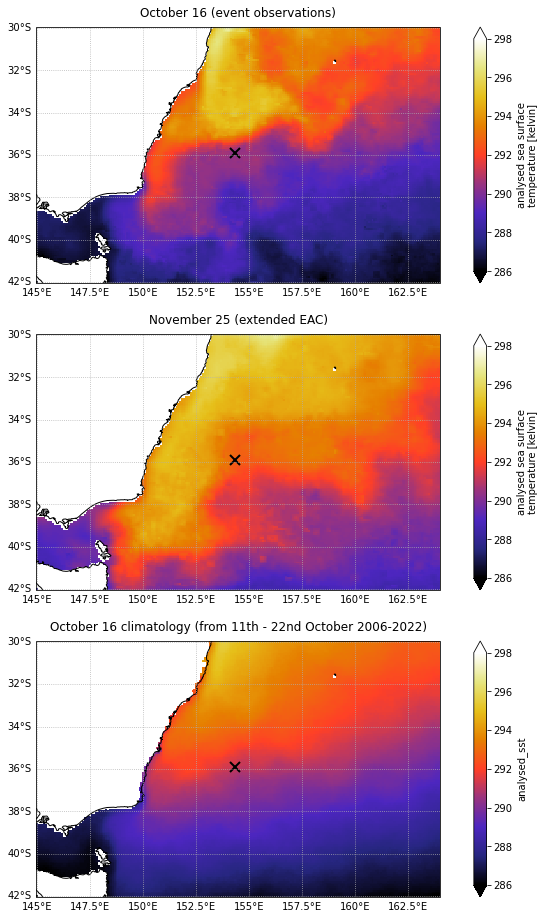

In [4]:
plt.figure(figsize=[12,16])

ax=plt.subplot(3,1,1,projection=ccrs.PlateCarree())
ramssa_1016.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"],ls=":")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
ax.set_title("October 16 (event observations)")

ax=plt.subplot(3,1,2,projection=ccrs.PlateCarree())
ramssa_nov.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"],ls=":")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
ax.set_title("November 25 (extended EAC)")

ax=plt.subplot(3,1,3,projection=ccrs.PlateCarree())
ramssa_climo.sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"],ls=":")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
ax.set_title("October 16 climatology (from 11th - 22nd October 2006-2022)")

# ax=plt.subplot(3,2,4,projection=ccrs.PlateCarree())
# (ramssa_1016+2).isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
# ax.coastlines()
# ax.gridlines(draw_labels=["bottom","left"],ls=":")
# ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
# ax.set_title("October 16 + 2 K")

# ax=plt.subplot(3,2,5,projection=ccrs.PlateCarree())
# (ramssa_1016-2).isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
# ax.coastlines()
# ax.gridlines(draw_labels=["bottom","left"],ls=":")
# ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
# ax.set_title("October 16 - 2 K")

# ax=plt.subplot(3,2,6,projection=ccrs.PlateCarree())
# (ramssa_sharp).sel(lat=slice(-42,-30),lon=slice(145,164)).plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
# ax.coastlines()
# ax.gridlines(draw_labels=["bottom","left"],ls=":")
# ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
# ax.set_title("October 16 with sharpened gradient (+/- 2 K either side of 292 K isotherm")

plt.savefig("/g/data/w40/ab4502/IN2023_V06/figs/sst_experiments.jpeg",dpi=400,bbox_inches="tight")

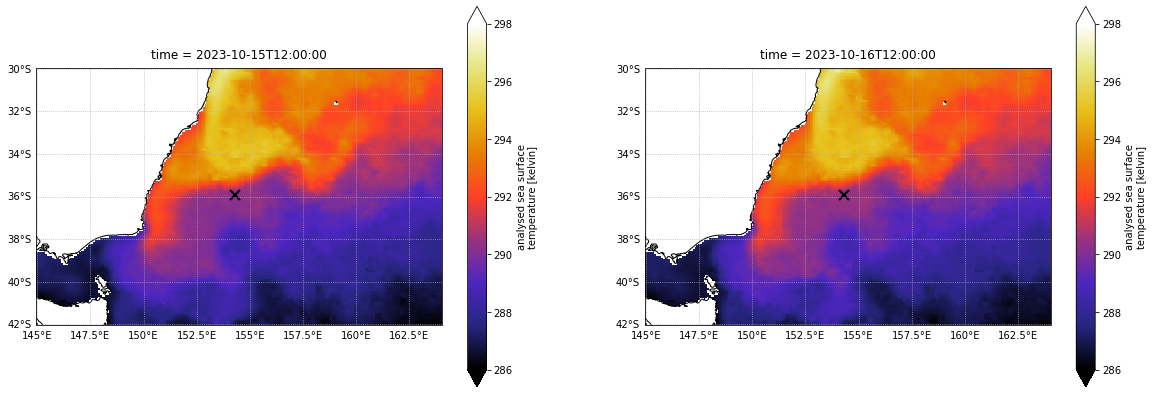

In [10]:
ramssa_1015 = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/ramssa_data/20231015120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc")

plt.figure(figsize=[20,7])

ax=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ramssa_1015.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"],ls=":")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)

ax=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
ramssa_1016.isel(time=0).sel(lat=slice(-42,-30),lon=slice(145,164)).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),vmin=286,vmax=298,extend="both")
ax.coastlines()
ax.gridlines(draw_labels=["bottom","left"],ls=":")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)

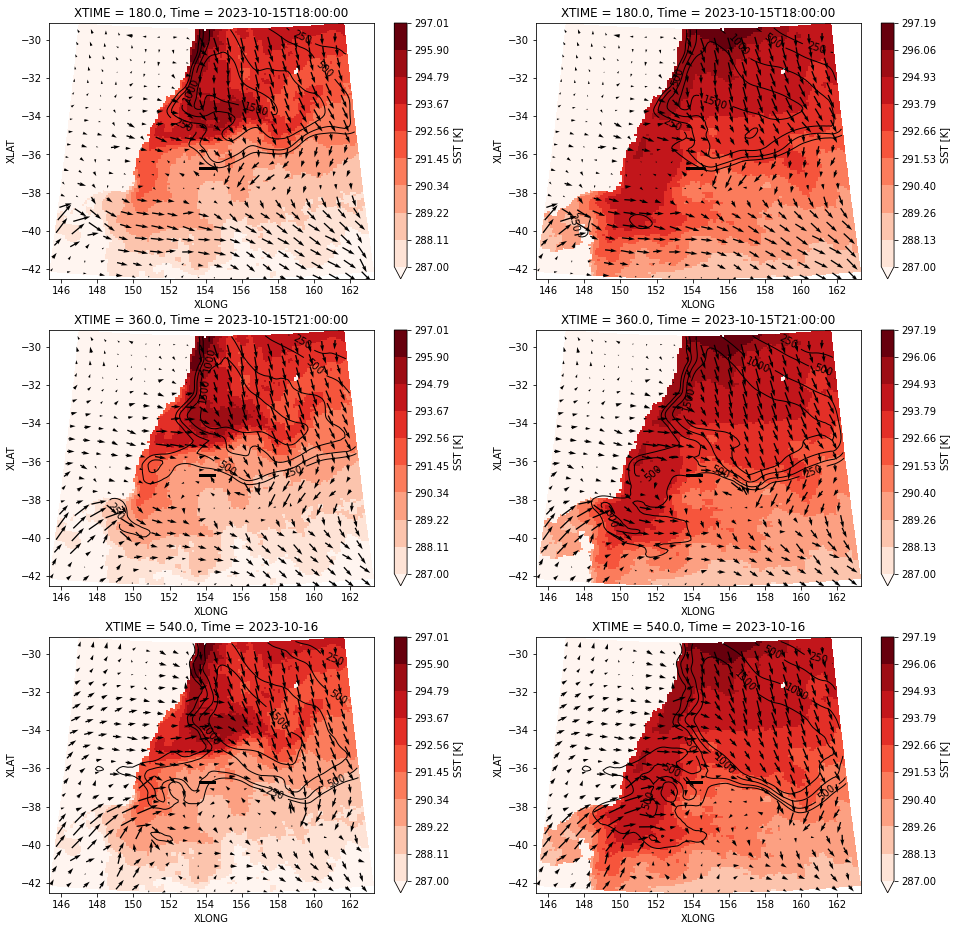

In [9]:
def temp_plot(ax,d,t):

    wrflist_d01 = nc.Dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/wrfout_"+d+"_"+t)
    (wrf.getvar(wrflist_d01,"SST")).plot(levels=10,x="XLONG",y="XLAT",vmin=287,cmap="Reds",ax=ax)

    wrflist_d01 = nc.Dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/highres_"+d+"_"+t)
    cs=xr.plot.contour(wrf.getvar(wrflist_d01,"AFWA_CAPE").rolling({"west_east":6,"south_north":6}).mean(),
                       levels=[250,500,1000,1500],x="XLONG",y="XLAT",colors="k",linewidths=1,ax=ax)
    plt.clabel(cs)

    step=6
    U = wrf.getvar(wrflist_d01,"U10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    V = wrf.getvar(wrflist_d01,"V10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    LONG = wrf.getvar(wrflist_d01,"XLONG").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    LAT = wrf.getvar(wrflist_d01,"XLAT").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    ax.quiver(LONG,LAT,U,V,width=0.004)

    lons1 = [153.7,154.45]
    lats1 = [-36.73,-36.73]
    ax.plot(lons1,lats1,color="k",lw=3)
    
def temp_plot2(ax,d,t):

    wrflist_d01 = nc.Dataset("/g/data/v46/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_nov23_shortlead/wrfout_"+d+"_"+t)
    (wrf.getvar(wrflist_d01,"SST")).plot(levels=10,x="XLONG",y="XLAT",vmin=287,cmap="Reds",ax=ax)

    wrflist_d01 = nc.Dataset("/g/data/v46/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_nov23_shortlead/highres_"+d+"_"+t)
    cs=xr.plot.contour(wrf.getvar(wrflist_d01,"AFWA_CAPE").rolling({"west_east":6,"south_north":6}).mean(),
                       levels=[250,500,1000,1500],x="XLONG",y="XLAT",colors="k",linewidths=1,ax=ax)
    plt.clabel(cs)

    step=6
    U = wrf.getvar(wrflist_d01,"U10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    V = wrf.getvar(wrflist_d01,"V10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    LONG = wrf.getvar(wrflist_d01,"XLONG").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    LAT = wrf.getvar(wrflist_d01,"XLAT").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
    ax.quiver(LONG,LAT,U,V,width=0.004)

    lons1 = [153.7,154.45]
    lats1 = [-36.73,-36.73]
    ax.plot(lons1,lats1,color="k",lw=3)   
    

plt.figure(figsize=[16,16])
pos1 = [ 1,3,5]
pos2 = [ 2,4,6]
d="d01"

for t,p1,p2 in zip(["2023-10-15_18:00:00","2023-10-15_21:00:00","2023-10-16_00:00:00"],pos1,pos2):
    
    ax=plt.subplot(3,2,p1)
    temp_plot(ax,d,t)
    ax=plt.subplot(3,2,p2)
    temp_plot2(ax,d,t)

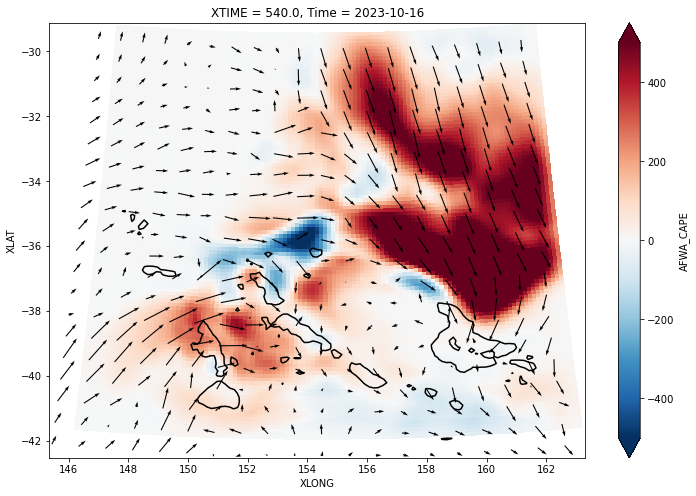

In [88]:
t = "2023-10-16_00:00:00"
d = "d01"

wrflist_oct = nc.Dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/highres_"+d+"_"+t)
cape_oct = wrf.getvar(wrflist_oct,"AFWA_CAPE").rolling({"west_east":6,"south_north":6}).mean()

wrflist_nov = nc.Dataset("/g/data/v46/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_nov23_shortlead/highres_"+d+"_"+t)
cape_nov = wrf.getvar(wrflist_nov,"AFWA_CAPE").rolling({"west_east":6,"south_north":6}).mean()

plt.figure(figsize=[12,8])
(cape_nov - cape_oct).plot(x="XLONG",y="XLAT",vmin=-500,vmax=500,cmap="RdBu_r")

step=6
U = wrf.getvar(wrflist_nov,"U10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
V = wrf.getvar(wrflist_nov,"V10").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
LONG = wrf.getvar(wrflist_nov,"XLONG").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
LAT = wrf.getvar(wrflist_nov,"XLAT").isel(west_east=slice(0,-1,step), south_north=slice(0,-1,step))
plt.gca().quiver(LONG,LAT,U,V,width=0.002)

xr.plot.contour(wrf.getvar(wrflist_nov,"mdbz"),x="XLONG",y="XLAT",levels=[30],colors="k")